In [43]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout
import random

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# on the left side click Files, then "upload to session storage" the 4 files 

In [46]:
train_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_images.csv', header=None)
train_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_labels.csv')

In [47]:
test_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_images.csv', header=None, names=train_images.columns)
test_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_labels.csv')


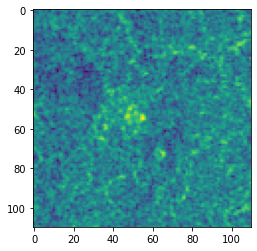

In [48]:
train_labels = train_labels.iloc[:, 0].to_numpy()
test_labels = test_labels.iloc[:, 0].to_numpy()

first = train_images.iloc[0].to_numpy()
first = first.reshape(110, 110)
plt.imshow(first);

##Standardize and Reshape Images

In [49]:
train_images_reshaped = train_images.values.reshape(len(train_images), 110, 110)
train_images_reshaped = train_images_reshaped / 255.0

In [50]:
test_images_reshaped = test_images.values.reshape(len(test_images), 110, 110)
test_images_reshaped = test_images_reshaped / 255.0

In [51]:
train_images_reshaped2 = train_images_reshaped
test_images_reshaped2 = test_images_reshaped


##Balance the Dataset a Bit and Augment Images

In [53]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# pick random images
n = [random.randrange(0, train_images_reshaped.shape[0]) for _ in range(train_images_reshaped.shape[0]//3)]

to_append = []

for index in n:

  image = train_images_reshaped[index]
  image = np.expand_dims(image, axis=0)

  augmented_image = data_augmentation(image)
  to_append.append(augmented_image)

  #ax = plt.subplot(3, 3, i + 1)
  #plt.imshow(np.squeeze(augmented_image))
  #plt.show()

train_images_reshaped = np.concatenate((train_images_reshaped, to_append), axis=0)

#for image in to_append:
#  train_images_reshaped = np.concatenate((train_images_reshaped, image), axis=0)

(7000, 110, 110)


In [54]:
train_images_reshaped = tf.convert_to_tensor(train_images.values.reshape(len(train_images), 110, 110, 1))
test_images_reshaped = tf.convert_to_tensor(test_images.values.reshape(len(test_images), 110, 110, 1))

##Create the Model

In [55]:

model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='sigmoid', input_shape = (110, 110, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(12, activation='sigmoid'))


model.add(layers.Flatten())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1, activation = 'sigmoid'))




model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy', "Precision", "Recall"])

In [56]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 108, 108, 6)       60        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 6)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 6)         0         
                                                                 
 dense_2 (Dense)             (None, 54, 54, 12)        84        
                                                                 
 flatten_1 (Flatten)         (None, 34992)             0         
                                                                 
 dropout_3 (Dropout)         (None, 34992)             0         
                                                     

##Train the Model

In [57]:
history = model.fit(train_images_reshaped, train_labels, epochs=120, 
                    validation_data=(test_images_reshaped, test_labels),
                    batch_size=32)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/120
219/219 [==============================] - 6s 23ms/step - loss: 0.6386 - accuracy: 0.8101 - precision: 0.1183 - recall: 0.0510 - val_loss: 0.4977 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/120
219/219 [==============================] - 4s 20ms/step - loss: 0.4947 - accuracy: 0.8436 - precision: 0.1854 - recall: 0.0280 - val_loss: 0.4338 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/120
219/219 [==============================] - 4s 20ms/step - loss: 0.5423 - accuracy: 0.8226 - precision: 0.1562 - recall: 0.0550 - val_loss: 0.5368 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/120
219/219 [==============================] - 4s 20ms/step - loss: 0.5769 - accuracy: 0.8117 - precision: 0.1558 - recall: 0.0720 - val_loss: 0.4340 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/120
219/219 [==============================] - 4s 20ms/s

##Evaluate the Model

In [58]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images_reshaped, test_labels)

print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)

86/86 [==============================] - 1s 11ms/step - loss: 0.3942 - accuracy: 0.8862 - precision: 0.6667 - recall: 0.5668
Test accuracy: 0.8862472772598267
Test precision: 0.6666666865348816
Test recall: 0.5668202638626099


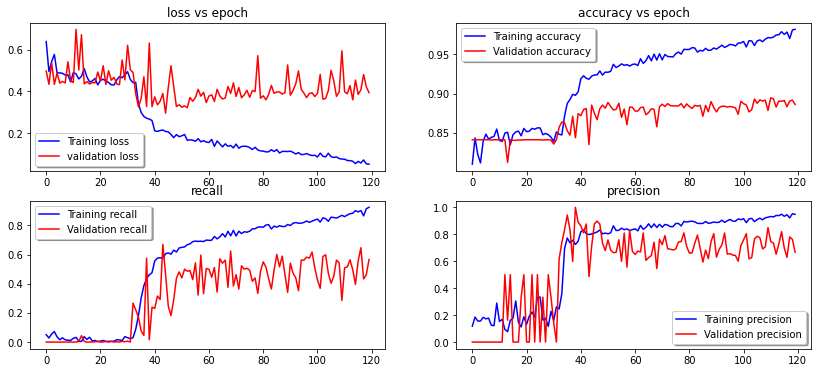

In [59]:
def plotLearningCurves(history):
    fig, ax = plt.subplots(2,2, figsize = (14,6))
    ax[0,0].plot(history.epoch, history.history['loss'], color='b', label="Training loss")
    ax[0,0].plot(history.epoch, history.history['val_loss'], color='r', label="validation loss")
    ax[0,0].legend(loc='best', shadow=True)
    ax[0,0].set_title('loss vs epoch')

    ax[0,1].plot(history.epoch, history.history['accuracy'], color='b', label="Training accuracy")
    ax[0,1].plot(history.epoch, history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax[0,1].legend(loc='best', shadow=True)
    ax[0,1].set_title('accuracy vs epoch')

    ax[1,0].plot(history.epoch, history.history['recall'], color='b', label="Training recall")
    ax[1,0].plot(history.epoch, history.history['val_recall'], color='r',label="Validation recall")
    ax[1,0].legend(loc='best', shadow=True)
    ax[1,0].set_title('recall')

    ax[1,1].plot(history.epoch, history.history['precision'], color='b', label="Training precision")
    ax[1,1].plot(history.epoch, history.history['val_precision'], color='r',label="Validation precision")
    ax[1,1].legend(loc='best', shadow=True)
    ax[1,1].set_title('precision')

plotLearningCurves(history)

In [60]:

# do this to fine tune
#model.trainable = False

df = pd.DataFrame.from_dict(history.history)
df[df['val_accuracy'] > .9].sort_values(by='val_accuracy', kind="mergesort", ascending=False)

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
